# Decision Trees

- Decision trees are widely used model for classification and regression tasks.
- Learn a hierarchy of i/else questions, leading to a decision.

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

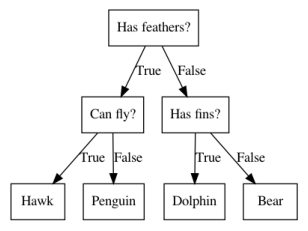

In [2]:
mglearn.plots.plot_animal_tree()

- Each nodes either represents a question or terminal node(leaf) that contains the answer.
- Instead of building models by hand, learn them from data using supervised learning.

## Building Decision Trees
- Learning a decision tree means learning the sequence of if/else questions that gets us to the tree answer most quickly.
- It forms "Is feature i larger than value a?"

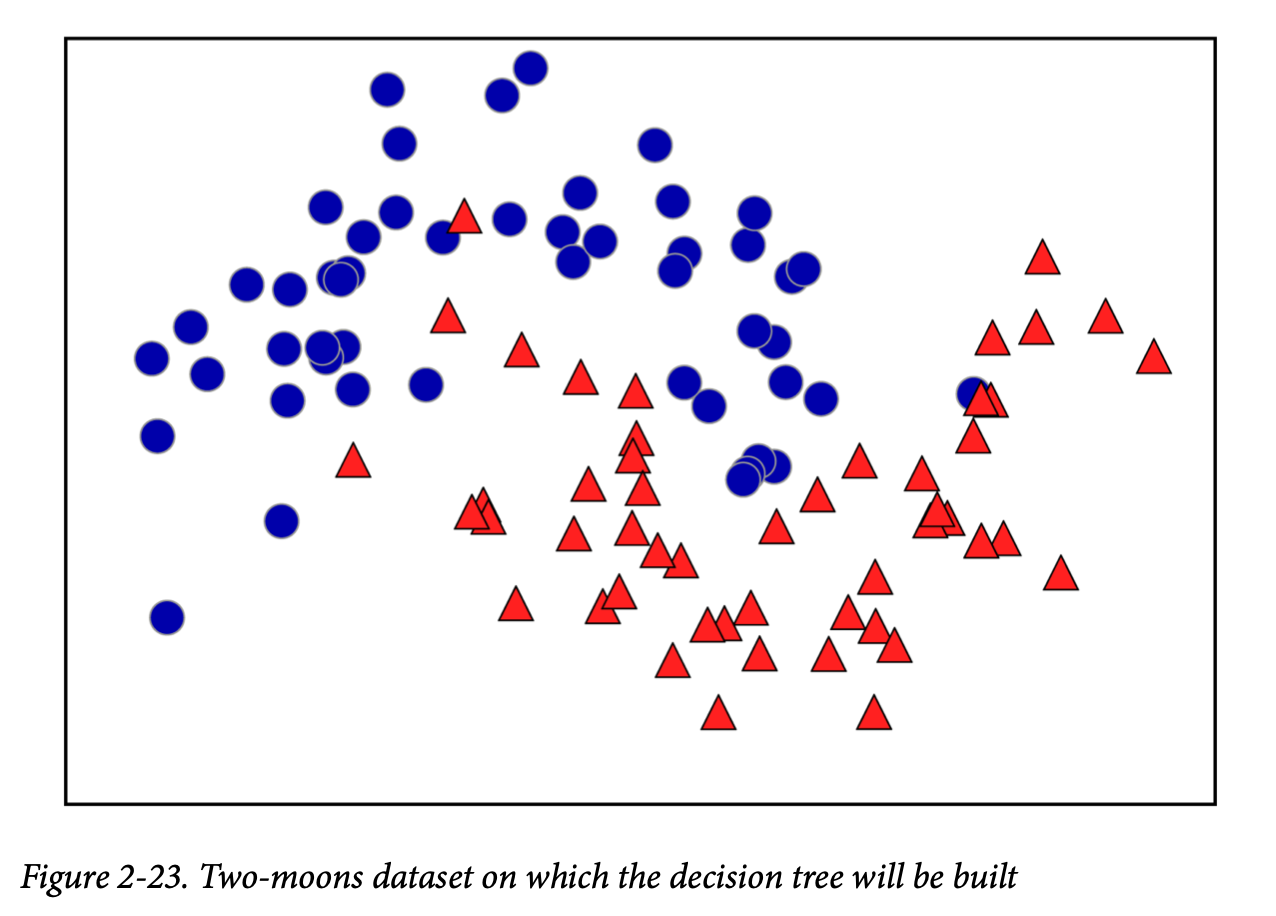

- Algorithm searches over all possible tests and finds the one that is most informative about the target variable.
- From the above graph, x[1]=0.0596 yields the most information
- We classify using this line as Figure 2-24.

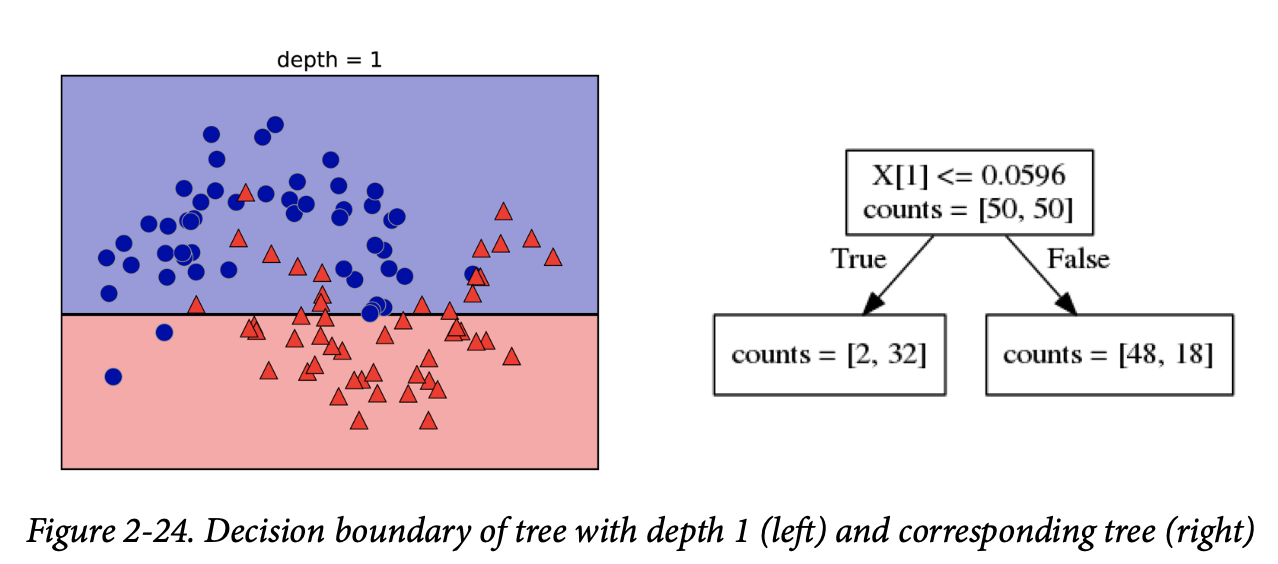

- Add one more line(more depth) to separate precisely

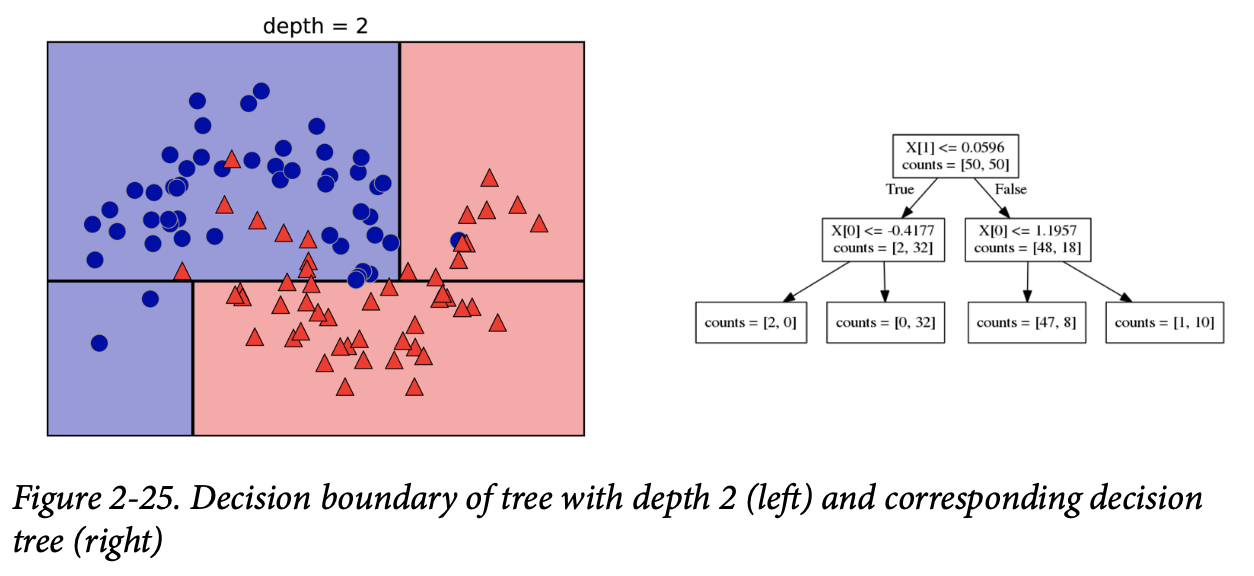

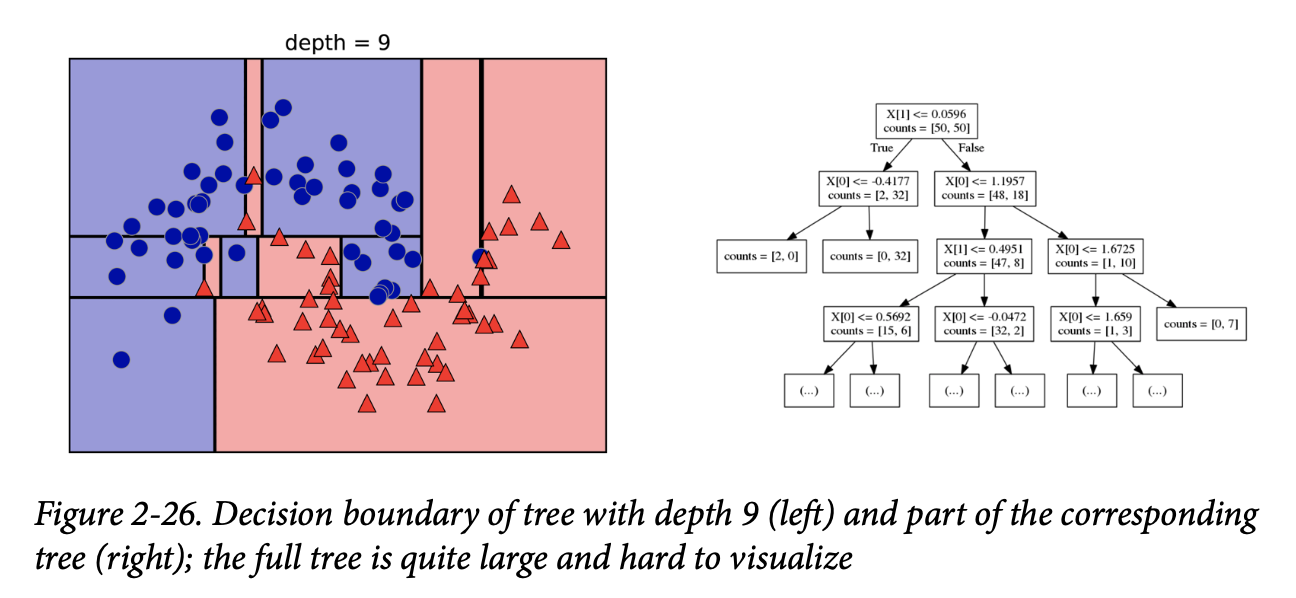

## Controlling complexity of decision trees

- Models are very complex, then it can be highly overfit to the training data.
- The overfitting can be seen on the left of Figure 2-26.
- There are two strategies to prevent overfitting.
    - Pre-pruning : stopping the creation of the tree early.
    - Post-pruning : building the tree but then removing or collapsing nodes that contain little information.

- Decision trees in scikit-learn only implements pre-pruning

> model without pre-pruning

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target, random_state= 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


> Model with pre-puring

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


- Limiting the depth of the tree decreases overfitting.
- Lower accuracy on the training set, but an improvement on the test set.

## Analyzing Decision Trees
- Visualize the tree using export_graphviz function.
- Write a file in the .dot file format(text file format for storing graphs).

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

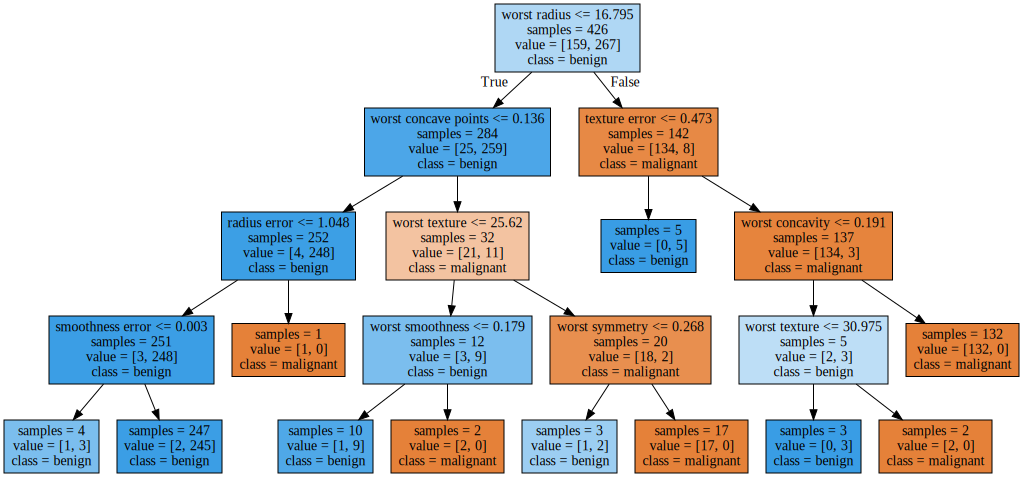

In [10]:
import graphviz
with open("tree.dot") as f: dot_graph = f.read()
graphviz.Source(dot_graph)

- Great in-depth view of how the algorithm makes predictions.
- Good example of a machine learning algorithm that is easily explained to nonexperts.
    - samples: number of samples in that node
    - value: number of samples per class

## Feature importance in trees
- Rates how important each freature is for the decision a tree makes.
- Number between 0 and 1 and the sum of feature importances always sum to 1.

In [11]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


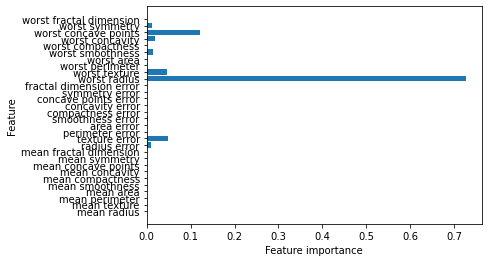

In [16]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

## Decision Tree Regressor
- Similar to the classification trees.
- Not able to extrpolate, or make predictions outside of the range of the training data.

## Parameters
- Control model complexity.
- pre-pruning parameters that stop the building of the tree.
    - max_depth, max_leaf_nodes, min_sample_leaf
    
## Strengths, Weakness

- Easily visualized and understood by nonexperts
- No preproessing like normalization, standardization of feature is needed
- Even with the use of pre-pruning, they tend to overfit and poor generalization performance.
